In [19]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio

In [20]:
backtester = Backtester(datetime(2020, 2, 1, 0, 0, 0))

In [101]:
LONG_FACTOR_CANDIDATES = [
#     "VLUE", # Value.
#     "USMV", # Low volatility.
#     "SDY", # Dividend.
    "VXX"
]
SHORT_FACTOR_CANDIDATES = [
    "SPY", # Large cap.
    "IWF", # Growth.
    "IWM", # Small cap.
    "MTUM", # Momentum.
]
LONG_CANDIDATES = [
    "AMZN",
    "BLK",
    "BABA",
    "DDOG",
    "FDX",
    "FIVN",
    "NVDA",
    "PBW",
    "PINS",
    "PTON",
    "SNAP",
    "SE",
    "SQ",
    "TTD",
    "TWLO",
    "TSLA",
    "UPS",
    "ZG",
    "SHOP",
    "UBER",
    "ARKK",
    "MCHI"
#     "SNOW" # Not enough data yet.
#     "U" # Not enough data yet.
] + LONG_FACTOR_CANDIDATES
SHORT_CANDIDATES = [
    "VRSN",
    "CSCO",
    "IBM",
    "BOX",
    "CLDR",
    "EQR",
    "NEWR",
    "VMW",
    "GDDY",
#     "RXT" # Rackspace. Not enough data yet.
    "ORCL",
    # Uber will outperform lyft because it's in the deliveries instead of transportations business.
    "LYFT", 
    "PS", # Who takes pluralsight training??
    "GRPN",
#     "APPS", # Pre-installed android crapware. But I don't know the business model.
    "DT" # Inferior to datadog.
] + SHORT_FACTOR_CANDIDATES

LONG_CANDIDATES = ["DT"]
SHORT_CANDIDATES = SHORT_FACTOR_CANDIDATES

r = backtester.backtest(LONG_CANDIDATES, SHORT_CANDIDATES, min_variance_portfolio)

In [41]:
print("LONG FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(LONG_CANDIDATES))
print()
print("SHORT FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(SHORT_CANDIDATES))

LONG FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=BABA

SHORT FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=SPY,IWF,IWM,MTUM


In [102]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

cum_returns = (r.returns_history+1).cumprod()
fig.add_trace(go.Scatter(x=cum_returns.index, y=cum_returns), row=1, col=1)
fig.update_yaxes(type="log", row=1, col=1)


long_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in LONG_CANDIDATES]]
for (k, v) in long_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=2, col=1)
    
short_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in SHORT_CANDIDATES]]
for (k, v) in short_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=3, col=1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,)
fig.show()

# Proposed Allocation

## Sorted A-Z

In [31]:
import plotly.express as px
data = r.allocation_history.iloc[-1]
px.bar(x=data.index, y=data)

## Sorted by weight

In [32]:
print(data[data!=0].sort_values())

SPY    -0.728973
MTUM   -0.391417
IWF    -0.183280
MCHI    1.000000
Name: 2020-10-29 00:00:00, dtype: float64


Start date,2020-02-03
End date,2020-10-29
Total months,9
,Backtest
Annual return,58.14%
Cumulative returns,41.021%
Annual volatility,26.915%
Sharpe ratio,1.84
Calmar ratio,3.77
Stability,0.36
Max drawdown,-15.413%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,15.41,2020-03-23,2020-05-28,2020-07-08,78
1,8.70,2020-07-09,2020-09-02,2020-10-28,80
2,5.17,2020-02-28,2020-03-04,2020-03-09,7
3,3.46,2020-02-04,2020-02-20,2020-02-24,15
4,2.77,2020-03-12,2020-03-13,2020-03-20,7


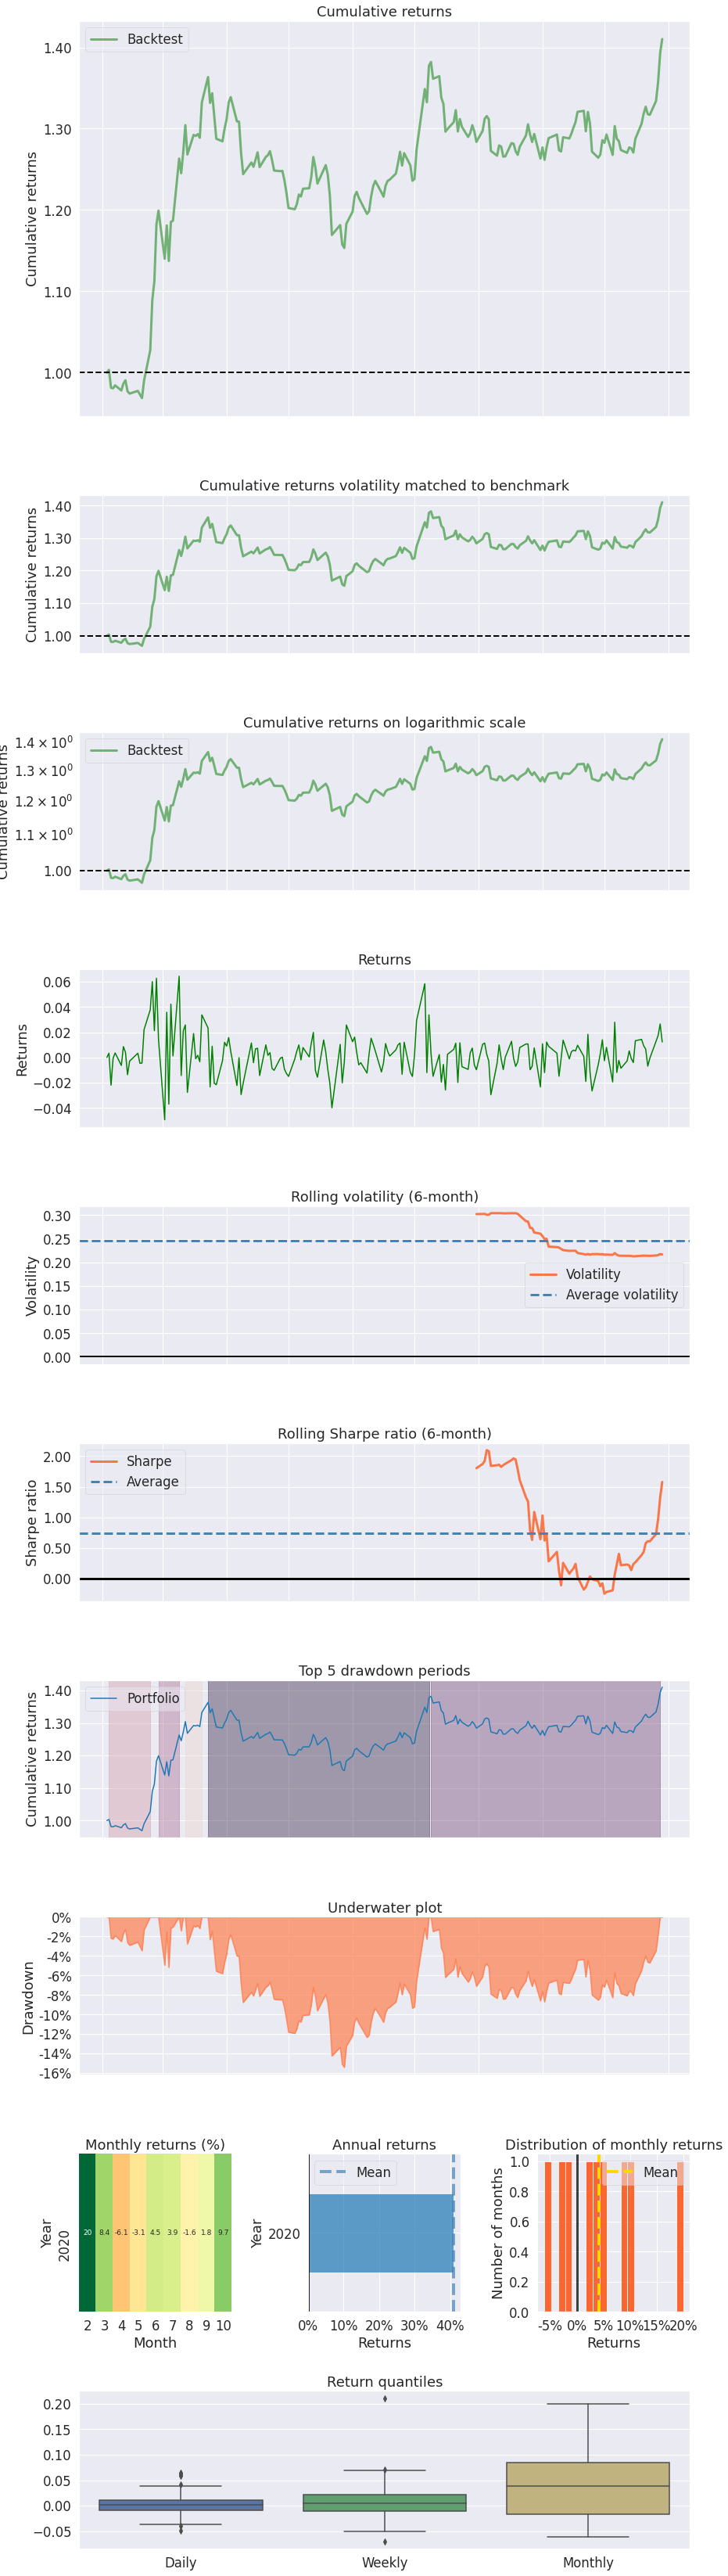

In [33]:
import pyfolio as pf
pf.create_returns_tear_sheet(r.returns_history)


In [27]:
if True:
    r.save_most_recent_allocation("./allocations/", leverage=1.5)